In [125]:
import os
from dotenv import load_dotenv # Parse a .env file and then load all the variables found as environment variables.
from sqlalchemy import create_engine 
import pandas as pd 

In [126]:
load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

In [127]:
# This is my query and tit works fine for me. Doesnt mean its good....
query = """SELECT
    p."Age",
    p.pregnancies,
    p.bmi,
    p.id,
    bm.insulin,
    bm.glucose,
    bm.bloodpressure,
    po.diabetespedigreefunction,
    po.outcome,
    s.skinthickness,
    bm.measurement_date
FROM
    diabetes.patient p
LEFT JOIN
    diabetes.blood_metrics bm  ON p.id = bm.patientid
LEFT JOIN
    diabetes.pedigree_outcome po ON p.id = po.patientid
LEFT JOIN
    diabetes.skin s ON p.id = s.patientid;"""

In [128]:
df_sqlalchemy = pd.read_sql(query, db)
df_sqlalchemy.head()

,Age,pregnancies,bmi,id,insulin,glucose,bloodpressure,diabetespedigreefunction,outcome,skinthickness,measurement_date
0,50,6,33.6,1,0,148,72,0.627,1,35,2022-12-13
1,31,1,26.6,2,0,85,66,0.351,0,29,2022-12-13
2,32,8,23.3,3,0,183,64,0.672,1,0,2022-12-13
3,21,1,28.1,4,94,89,66,0.167,0,23,2022-12-13
4,33,0,43.1,5,168,137,40,2.288,1,35,2022-12-13


In [129]:
# Save df as .csv file for future use
df_sqlalchemy.to_csv("Diabetes.csv", index=False)

In [130]:
# import using pd and display df
df = pd.read_csv("Diabetes.csv")
df.head(10)

,Age,pregnancies,bmi,id,insulin,glucose,bloodpressure,diabetespedigreefunction,outcome,skinthickness,measurement_date
0,50,6,33.6,1,0,148,72,0.627,1,35,2022-12-13
1,31,1,26.6,2,0,85,66,0.351,0,29,2022-12-13
2,32,8,23.3,3,0,183,64,0.672,1,0,2022-12-13
3,21,1,28.1,4,94,89,66,0.167,0,23,2022-12-13
4,33,0,43.1,5,168,137,40,2.288,1,35,2022-12-13
5,30,5,25.6,6,0,116,74,0.201,0,0,2022-12-13
6,26,3,31.0,7,88,78,50,0.248,1,32,2022-12-13
7,29,10,35.3,8,0,115,0,0.134,0,0,2022-12-13
8,53,2,30.5,9,543,197,70,0.158,1,45,2022-12-13
9,54,8,0.0,10,0,125,96,0.232,1,0,2022-12-13


In [131]:
# Lets Begin.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1536 non-null   int64  
 1   pregnancies               1536 non-null   int64  
 2   bmi                       1536 non-null   float64
 3   id                        1536 non-null   int64  
 4   insulin                   1536 non-null   int64  
 5   glucose                   1536 non-null   int64  
 6   bloodpressure             1536 non-null   int64  
 7   diabetespedigreefunction  1536 non-null   float64
 8   outcome                   1536 non-null   int64  
 9   skinthickness             1536 non-null   int64  
 10  measurement_date          1536 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 132.1+ KB


In [132]:
df.id.unique().max()

768

In [133]:
df.measurement_date.unique()

array(['2022-12-13', '2022-12-01'], dtype=object)

In [134]:
df[df["outcome"] != 0].count()

Age                         536
pregnancies                 536
bmi                         536
id                          536
insulin                     536
glucose                     536
bloodpressure               536
diabetespedigreefunction    536
outcome                     536
skinthickness               536
measurement_date            536
dtype: int64

In [135]:
zero = pd.DataFrame((df == 0).sum(), columns=["amount"])
zero["percentage"] = round((zero["amount"] / df.shape[0]) *100, 2)
zero = zero[zero["amount"] != 0]
zero

,amount,percentage
pregnancies,222,14.45
bmi,22,1.43
insulin,380,24.74
glucose,9,0.59
bloodpressure,36,2.34
outcome,1000,65.10
skinthickness,454,29.56


In [136]:
features = df.columns.drop("outcome")
outcome_zero = df["outcome"] == 0
feature_zero = (df[features] == 0).any(axis=1)
rows_to_drop = outcome_zero & feature_zero

In [137]:
print(feature_zero.sum())
print(rows_to_drop.sum())

746
472


In [138]:
df1 = df.copy()
df1 = df1[~rows_to_drop]

In [139]:
df1.head()

,Age,pregnancies,bmi,id,insulin,glucose,bloodpressure,diabetespedigreefunction,outcome,skinthickness,measurement_date
0,50,6,33.6,1,0,148,72,0.627,1,35,2022-12-13
2,32,8,23.3,3,0,183,64,0.672,1,0,2022-12-13
3,21,1,28.1,4,94,89,66,0.167,0,23,2022-12-13
4,33,0,43.1,5,168,137,40,2.288,1,35,2022-12-13
6,26,3,31.0,7,88,78,50,0.248,1,32,2022-12-13


In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 0 to 1535
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1064 non-null   int64  
 1   pregnancies               1064 non-null   int64  
 2   bmi                       1064 non-null   float64
 3   id                        1064 non-null   int64  
 4   insulin                   1064 non-null   int64  
 5   glucose                   1064 non-null   int64  
 6   bloodpressure             1064 non-null   int64  
 7   diabetespedigreefunction  1064 non-null   float64
 8   outcome                   1064 non-null   int64  
 9   skinthickness             1064 non-null   int64  
 10  measurement_date          1064 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 99.8+ KB


In [141]:
df1.describe().round(2)

,Age,pregnancies,bmi,id,insulin,glucose,bloodpressure,diabetespedigreefunction,outcome,skinthickness
count,1064.00,1064.00,1064.00,1064.00,1064.00,1064.00,1064.00,1064.00,1064.0,1064.00
mean,33.28,4.09,33.07,382.28,78.01,113.53,65.96,0.50,0.5,24.47
std,11.01,3.34,7.07,223.95,92.44,49.59,28.69,0.34,0.5,14.54
min,21.00,0.00,0.00,1.00,0.00,0.00,0.00,0.08,0.0,0.00
25%,24.00,1.00,28.50,192.75,18.00,86.00,50.00,0.26,0.0,16.00
50%,30.00,3.00,32.90,375.50,58.00,116.00,70.00,0.41,1.0,27.00
75%,41.00,6.00,37.10,578.00,94.00,150.00,84.00,0.67,1.0,35.00
max,81.00,17.00,67.10,768.00,846.00,200.00,122.00,2.42,1.0,99.00


In [142]:
zero = pd.DataFrame((df1 == 0).sum(), columns=["amount"])
zero["percentage"] = round((zero["amount"] / df1.shape[0]) *100, 2)
zero = zero[zero["amount"] != 0]
zero

,amount,percentage
pregnancies,76,7.14
bmi,4,0.38
insulin,139,13.06
glucose,3,0.28
bloodpressure,17,1.60
outcome,528,49.62
skinthickness,176,16.54


In [143]:
mean_skin_thinkness = df1.loc[df1["skinthickness"] != 0, "skinthickness"].mean()
df1["skinthickness"] = df1["skinthickness"].replace(0, mean_skin_thinkness).round(0)

In [144]:
zero = pd.DataFrame((df1 == 0).sum(), columns=["amount"])
zero["percentage"] = round((zero["amount"] / df1.shape[0]) *100, 2)
zero = zero[zero["amount"] != 0]
zero

,amount,percentage
pregnancies,76,7.14
bmi,4,0.38
insulin,139,13.06
glucose,3,0.28
bloodpressure,17,1.60
outcome,528,49.62


In [145]:
mean_insulin = df1.loc[df1["insulin"] != 0, "insulin"].mean()
df1["insulin"] = df1["insulin"].replace(0, mean_insulin).round(1)

In [146]:
mean_bmi = df1.loc[df1['bmi'] != 0, 'bmi'].mean()
df1['bmi'] = df1['bmi'].replace(0, mean_bmi).round(1)

In [147]:
mean_glucose = df1.loc[df1['glucose'] != 0, 'glucose'].mean()
df1['glucose'] = df1['glucose'].replace(0, mean_glucose).round(1)

In [148]:
mean_bp = df1.loc[df1['bloodpressure'] != 0, 'bloodpressure'].mean()
df1['bloodpressure'] = df1['bloodpressure'].replace(0, mean_glucose).round(1)

In [149]:
df1 = df1.drop(columns="measurement_date")

In [150]:
zero = pd.DataFrame((df1 == 0).sum(), columns=["amount"])
zero["percentage"] = round((zero["amount"] / df1.shape[0]) *100, 2)
zero = zero[zero["amount"] != 0]
zero

,amount,percentage
pregnancies,76,7.14
outcome,528,49.62


In [151]:
preg_dummies = pd.get_dummies(df1["pregnancies"], drop_first=True, prefix="-", dtype=int)
preg_dummies = preg_dummies.astype(str)
df1 = pd.concat([df1, preg_dummies], axis=1)

In [152]:
df1.head()

,Age,pregnancies,bmi,id,insulin,glucose,bloodpressure,diabetespedigreefunction,outcome,skinthickness,...,-_7,-_8,-_9,-_10,-_11,-_12,-_13,-_14,-_15,-_17
0,50,6,33.6,1,89.7,148.0,72.0,0.627,1,35.0,...,0,0,0,0,0,0,0,0,0,0
2,32,8,23.3,3,89.7,183.0,64.0,0.672,1,29.0,...,0,1,0,0,0,0,0,0,0,0
3,21,1,28.1,4,94.0,89.0,66.0,0.167,0,23.0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,43.1,5,168.0,137.0,40.0,2.288,1,35.0,...,0,0,0,0,0,0,0,0,0,0
6,26,3,31.0,7,88.0,78.0,50.0,0.248,1,32.0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression

In [154]:
X = df1.drop(columns=["outcome", "pregnancies"])
y = df1.outcome
print(f"We have {X.shape[0]} observations in our dataframe and {X.shape[1]} features")
print(f"Our target 'Outcome' has also {y.shape[0]} values")

We have 1064 observations in our dataframe and 24 features
Our target 'Outcome' has also 1064 values


In [155]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [156]:
df1.columns = df1.columns.astype(str)

In [157]:
log_reg = LogisticRegression(random_state=42, solver="liblinear", max_iter=1000)
log_reg.fit(x_train, y_train)
score = log_reg.score(x_test, y_test).round(2)
print(score)

0.72


In [158]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for solver in solvers:
    log_reg = LogisticRegression(random_state=42, solver=solver, max_iter=10000)
    log_reg.fit(x_train, y_train)
    score = log_reg.score(x_test, y_test).round(2)
    print(solver, score)

lbfgs 0.73
liblinear 0.72
newton-cg 0.73
newton-cholesky 0.73
sag 0.72
saga 0.7


In [159]:
import numpy as np
results = {}
c_array = np.linspace(0.01, 1.0, num=10)

In [160]:
print(c_array)

[0.01 0.12 0.23 0.34 0.45 0.56 0.67 0.78 0.89 1.  ]


In [161]:
for solver in solvers:
    for c in c_array:
        log_reg = LogisticRegression(C=c, random_state=42, solver=solver, max_iter=10000)
        log_reg.fit(x_train, y_train)
        score = log_reg.score(x_test, y_test).round(2)
        results.setdefault(solver, []).append([c, score])

In [162]:
best_solver = None
best_c = None
best_score = -float("inf")

for solver, entries in results.items():
    for c, score in entries:
        if score > best_score:
            best_score = score
            best_solver = solver
            best_c = c

print(f"Best solver: {best_solver}, Best C: {best_c}, socre={best_score:.3f}")

Best solver: liblinear, Best C: 0.34, socre=0.740


In [163]:
penalties = ["l1", "l2", "elasticnet"]

for solver in solvers:
    for penalty in penalties:
        try:
            # elasticnet needs l1_ratio and saga
            if penalty == "elasticnet":
                log_reg = LogisticRegression(random_state=420,
                                             solver=solver,
                                             penalty=penalty,
                                             l1_ratio=0.5,
                                             max_iter=10000
                )
            else:
                log_reg = LogisticRegression(random_state=420,
                                             solver=solver,
                                             penalty=penalty,
                                             max_iter=10000
                )
            log_reg.fit(x_train, y_train)
            score = log_reg.score(x_test, y_test).round(2)
            print(f"solver={solver:14s} penalty={penalty:10s} score={score}")

        except ValueError as e:
            print(f"Skipping solver={solver}, penalty={penalty} -> {e}")
            continue

Skipping solver=lbfgs, penalty=l1 -> Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.
solver=lbfgs          penalty=l2         score=0.73
Skipping solver=lbfgs, penalty=elasticnet -> Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.
solver=liblinear      penalty=l1         score=0.73
solver=liblinear      penalty=l2         score=0.72
Skipping solver=liblinear, penalty=elasticnet -> Only 'saga' solver supports elasticnet penalty, got solver=liblinear.
Skipping solver=newton-cg, penalty=l1 -> Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.
solver=newton-cg      penalty=l2         score=0.73
Skipping solver=newton-cg, penalty=elasticnet -> Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.
Skipping solver=newton-cholesky, penalty=l1 -> Solver newton-cholesky supports only 'l2' or 'none' penalties, got l1 penalty.
solver=newton-cholesky penalty=l2         score=0.73
Skipping solver=newton

In [214]:
df2 = df.copy()
df2.head()

,Age,pregnancies,bmi,id,insulin,glucose,bloodpressure,diabetespedigreefunction,outcome,skinthickness,measurement_date
0,50,6,33.6,1,0,148,72,0.627,1,35,2022-12-13
1,31,1,26.6,2,0,85,66,0.351,0,29,2022-12-13
2,32,8,23.3,3,0,183,64,0.672,1,0,2022-12-13
3,21,1,28.1,4,94,89,66,0.167,0,23,2022-12-13
4,33,0,43.1,5,168,137,40,2.288,1,35,2022-12-13


In [215]:
df2[(df2["measurement_date"] == '2022-12-13') & (df2["insulin"] == 0)].count()

Age                         374
pregnancies                 374
bmi                         374
id                          374
insulin                     374
glucose                     374
bloodpressure               374
diabetespedigreefunction    374
outcome                     374
skinthickness               374
measurement_date            374
dtype: int64

In [216]:
df2["insulin"] = df2["insulin"].replace(0, np.nan)

In [217]:
df2 = df2.sort_values(["id", "measurement_date"])
df2["insulin"] = df2.groupby("id")["insulin"].ffill()
df2.head(20)

,Age,pregnancies,bmi,id,insulin,glucose,bloodpressure,diabetespedigreefunction,outcome,skinthickness,measurement_date
768,50,6,33.6,1,80.0,172,117,0.627,1,35,2022-12-01
0,50,6,33.6,1,80.0,148,72,0.627,1,35,2022-12-13
769,31,1,26.6,2,80.0,54,93,0.351,0,29,2022-12-01
1,31,1,26.6,2,80.0,85,66,0.351,0,29,2022-12-13
770,32,8,23.3,3,1.0,168,100,0.672,1,0,2022-12-01
2,32,8,23.3,3,1.0,183,64,0.672,1,0,2022-12-13
771,21,1,28.1,4,26.0,53,39,0.167,0,23,2022-12-01
3,21,1,28.1,4,94.0,89,66,0.167,0,23,2022-12-13
772,33,0,43.1,5,54.0,184,116,2.288,1,35,2022-12-01
4,33,0,43.1,5,168.0,137,40,2.288,1,35,2022-12-13


In [218]:
df2.loc[df2["insulin"].isna() == True, "insulin"]

1082   NaN
314    NaN
1142   NaN
1196   NaN
1229   NaN
461    NaN
1302   NaN
1478   NaN
Name: insulin, dtype: float64

In [219]:
df2 = df2.dropna(axis=0)

In [220]:
zeros = pd.DataFrame((df2 == 0).sum(), columns=["Amount"])
zeros['Percentage'] = round((zeros['Amount'] / df2.shape[0]) * 100, 2)
zeros = zeros[zeros['Amount'] != 0]
zeros

,Amount,Percentage
pregnancies,221,14.46
bmi,22,1.44
glucose,9,0.59
bloodpressure,36,2.36
outcome,994,65.05
skinthickness,452,29.58


In [221]:
df2.columns = df2.columns.str.lower()
df2 = df2.rename(columns={
    'bloodpressure': 'bp',
    'diabetespedigreefunction': 'dbp',
    'skinthickness': 'sth'
})
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 768 to 767
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1528 non-null   int64  
 1   pregnancies       1528 non-null   int64  
 2   bmi               1528 non-null   float64
 3   id                1528 non-null   int64  
 4   insulin           1528 non-null   float64
 5   glucose           1528 non-null   int64  
 6   bp                1528 non-null   int64  
 7   dbp               1528 non-null   float64
 8   outcome           1528 non-null   int64  
 9   sth               1528 non-null   int64  
 10  measurement_date  1528 non-null   object 
dtypes: float64(3), int64(7), object(1)
memory usage: 143.2+ KB


In [222]:
condition = [
    (df2["bmi"] >= 18) & (df2["bmi"] < 25),
    (df2["bmi"] >= 25) & (df2["bmi"] < 30),
    (df2["bmi"] >= 30) 
]

choices = [1, 2, 3]

df2["bmi_category"] = np.select(condition, choices, default=np.nan)
df2.columns

Index(['age', 'pregnancies', 'bmi', 'id', 'insulin', 'glucose', 'bp', 'dbp',
       'outcome', 'sth', 'measurement_date', 'bmi_category'],
      dtype='object')

In [223]:
# Define conditions for each bp category 
conditions = [
    (df2['bp'] < 80),  # Healthy BP
    (df2['bp'] > 80) & (df2['bp'] <= 89),      # Prehypertension range
    (df2['bp'] > 89) & (df2['bp'] < 125)]     # Stage 1 Hypertension range

# Define the corresponding labels
choices = [1, 2, 3]

# Create the new categorical column
df2['BP_category'] = np.select(conditions, choices, default=np.nan)
df2.columns

Index(['age', 'pregnancies', 'bmi', 'id', 'insulin', 'glucose', 'bp', 'dbp',
       'outcome', 'sth', 'measurement_date', 'bmi_category', 'BP_category'],
      dtype='object')

In [224]:
condition = [
    (df2["pregnancies"] == 0),
    (df2["pregnancies"] > 0) & (df2["pregnancies"] <= 2),
    (df2["pregnancies"] > 2) & (df2["pregnancies"] < 8),
    (df2["pregnancies"] >= 8)
]

choices = [1, 2, 3, 4]

df2["pregnancies_category"] = np.select(condition, choices, default=np.nan)
df2.columns

Index(['age', 'pregnancies', 'bmi', 'id', 'insulin', 'glucose', 'bp', 'dbp',
       'outcome', 'sth', 'measurement_date', 'bmi_category', 'BP_category',
       'pregnancies_category'],
      dtype='object')

In [225]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 768 to 767
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1528 non-null   int64  
 1   pregnancies           1528 non-null   int64  
 2   bmi                   1528 non-null   float64
 3   id                    1528 non-null   int64  
 4   insulin               1528 non-null   float64
 5   glucose               1528 non-null   int64  
 6   bp                    1528 non-null   int64  
 7   dbp                   1528 non-null   float64
 8   outcome               1528 non-null   int64  
 9   sth                   1528 non-null   int64  
 10  measurement_date      1528 non-null   object 
 11  bmi_category          1506 non-null   float64
 12  BP_category           1481 non-null   float64
 13  pregnancies_category  1528 non-null   float64
dtypes: float64(6), int64(7), object(1)
memory usage: 179.1+ KB


In [226]:
conditions = [(df2['age'] >= 21) & (df2['age'] < 30), 
              (df2['age'] >= 31) & (df2['age'] < 40),      
              (df2['age'] >= 41) & (df2['age'] < 50),
              (df2["age"] > 51)]                   

# Define the corresponding labels
choices = [1, 2, 3, 4]

# Create the new categorical column
df2['AGE_category'] = np.select(conditions, choices, default=np.nan)
df2.columns

Index(['age', 'pregnancies', 'bmi', 'id', 'insulin', 'glucose', 'bp', 'dbp',
       'outcome', 'sth', 'measurement_date', 'bmi_category', 'BP_category',
       'pregnancies_category', 'AGE_category'],
      dtype='object')

In [227]:
df2.AGE_category = df2.AGE_category.astype("category")
df2.bmi_category = df2.bmi_category.astype('category')
df2.pregnancies = df2.pregnancies.astype('category')
df2.BP_category = df2.BP_category.astype('category')
df2.pregnancies_category = df2.pregnancies_category.astype("category")

In [228]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 768 to 767
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   1528 non-null   int64   
 1   pregnancies           1528 non-null   category
 2   bmi                   1528 non-null   float64 
 3   id                    1528 non-null   int64   
 4   insulin               1528 non-null   float64 
 5   glucose               1528 non-null   int64   
 6   bp                    1528 non-null   int64   
 7   dbp                   1528 non-null   float64 
 8   outcome               1528 non-null   int64   
 9   sth                   1528 non-null   int64   
 10  measurement_date      1528 non-null   object  
 11  bmi_category          1506 non-null   category
 12  BP_category           1481 non-null   category
 13  pregnancies_category  1528 non-null   category
 14  AGE_category          1428 non-null   category
dtypes: categ

In [229]:
num_features = list(df2.columns[df2.dtypes != "category"])
num_features.remove("outcome")
num_features

['age',
 'bmi',
 'id',
 'insulin',
 'glucose',
 'bp',
 'dbp',
 'sth',
 'measurement_date']

In [230]:
cat_features = list(df2.columns[df2.dtypes == "category"])
cat_features.remove("pregnancies")
cat_features

['bmi_category', 'BP_category', 'pregnancies_category', 'AGE_category']

In [231]:
import seaborn as sns

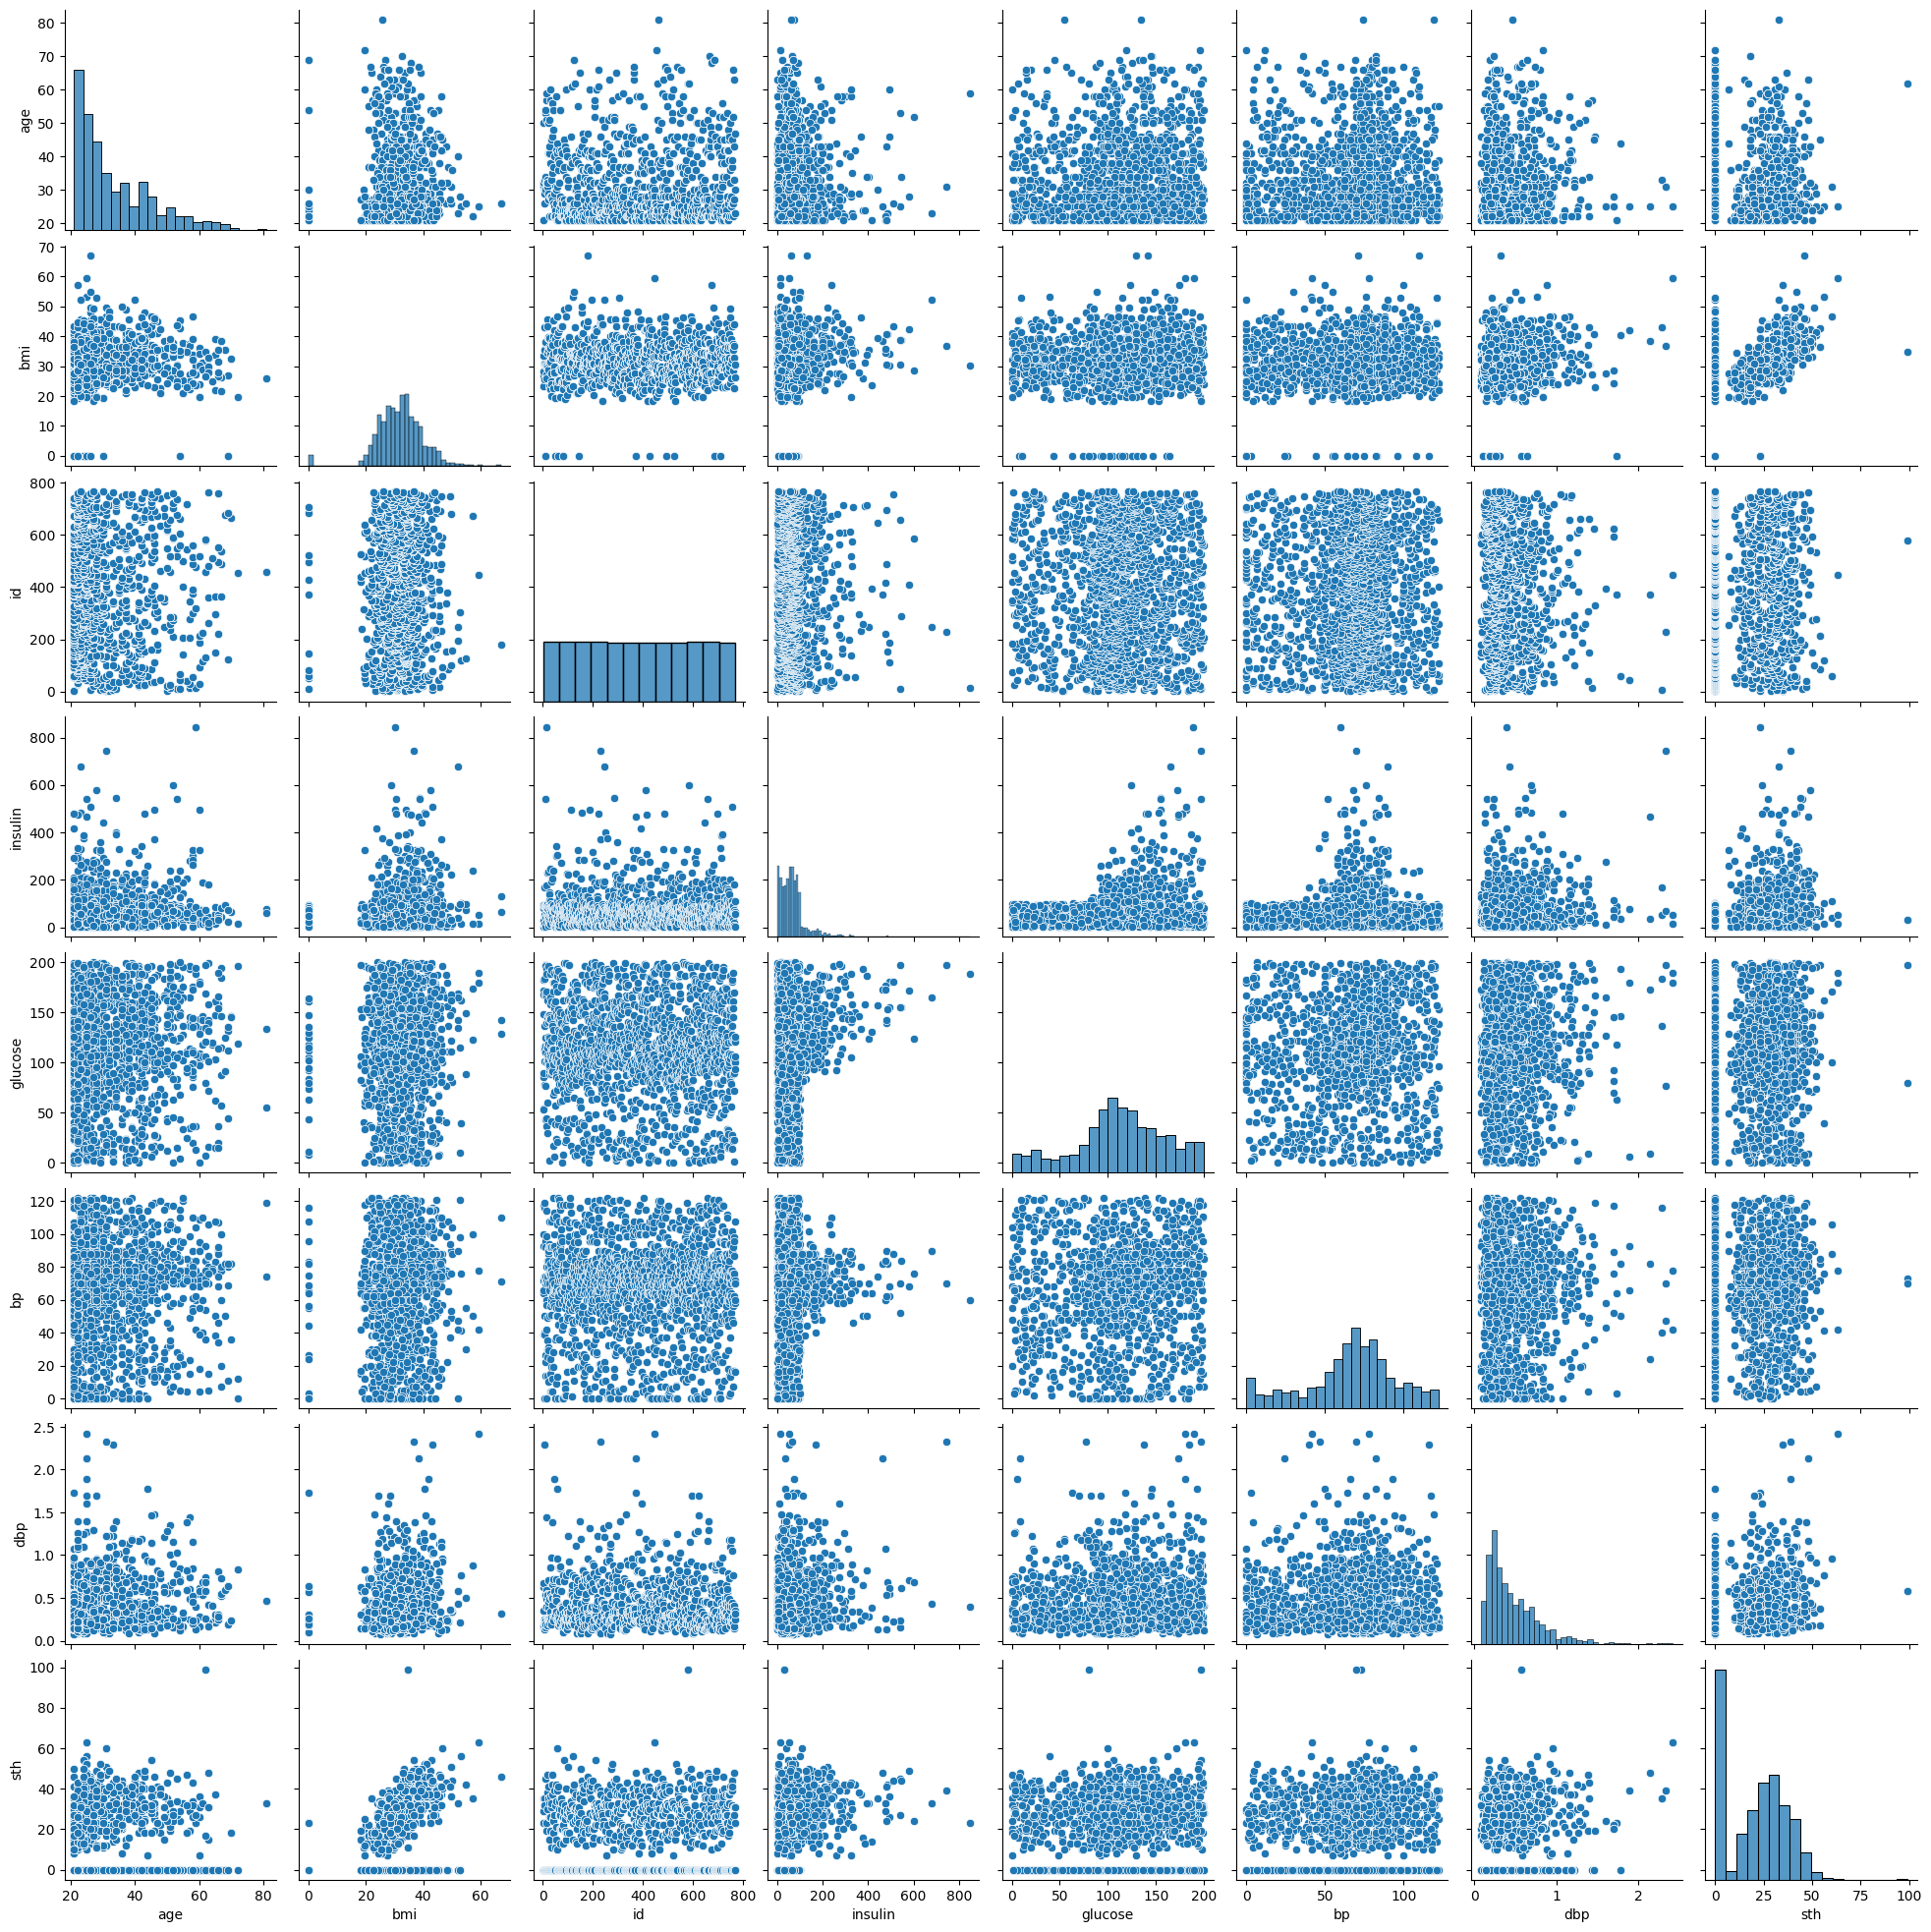

In [232]:
sns.pairplot(df2[num_features])

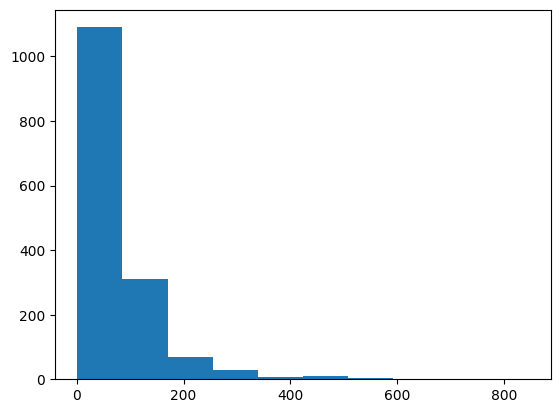

In [233]:
import matplotlib.pyplot as plt
plt.hist(df2["insulin"]);


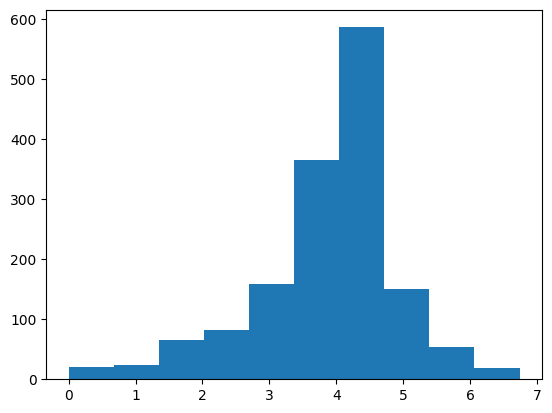

In [234]:
df2["insulin_log"] = np.log(df2["insulin"])
plt.hist(df2["insulin_log"]);

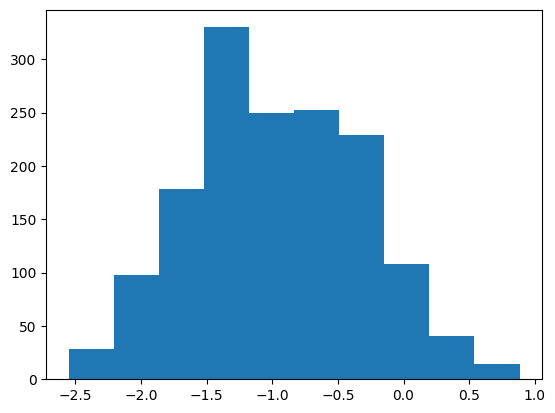

In [235]:
df2["dbp_log"] = np.log(df2["dbp"])
plt.hist(df2["dbp_log"]);

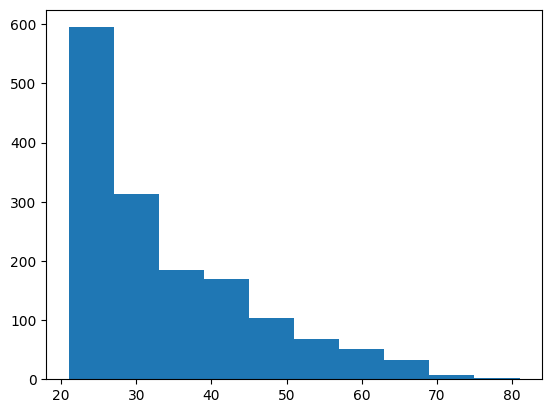

In [236]:
plt.hist(df2["age"]);

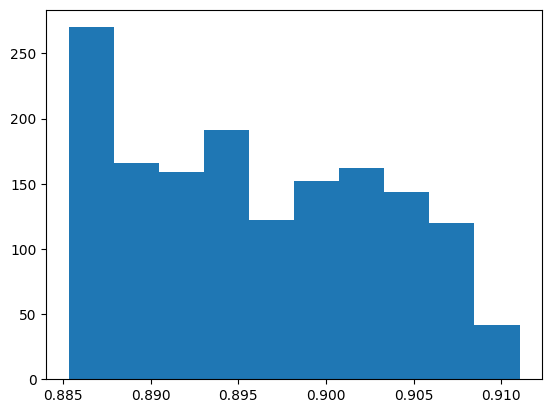

In [237]:
from scipy.stats import boxcox
df2["age_BC"], lam = boxcox(df2["age"])
plt.hist(df2["age_BC"]);

In [238]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 768 to 767
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   1528 non-null   int64   
 1   pregnancies           1528 non-null   category
 2   bmi                   1528 non-null   float64 
 3   id                    1528 non-null   int64   
 4   insulin               1528 non-null   float64 
 5   glucose               1528 non-null   int64   
 6   bp                    1528 non-null   int64   
 7   dbp                   1528 non-null   float64 
 8   outcome               1528 non-null   int64   
 9   sth                   1528 non-null   int64   
 10  measurement_date      1528 non-null   object  
 11  bmi_category          1506 non-null   category
 12  BP_category           1481 non-null   category
 13  pregnancies_category  1528 non-null   category
 14  AGE_category          1428 non-null   category
 15  insulin_

In [239]:
df2 = df2.drop(columns=["measurement_date", "pregnancies", "bmi", "bp", "age", "pregnancies"])

In [251]:
num_features = list(df2.columns[df2.dtypes != "category"])
num_features.remove("outcome")
num_features

['id', 'insulin', 'glucose', 'dbp', 'sth', 'insulin_log', 'dbp_log', 'age_BC']

In [254]:
cat_features = list(df2.columns[df2.dtypes == "category"])
cat_features

['bmi_category', 'BP_category', 'pregnancies_category', 'AGE_category']

In [255]:
X = df2.drop("outcome", axis=1)
y = df2.outcome
print(f"We have {X.shape[0]} observations in our dataset and {X.shape[1]} features")
print(f"Our target vector has also {y.shape[0]} values")

We have 1528 observations in our dataset and 12 features
Our target vector has also 1528 values


In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [257]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1146, 12)
X_test shape: (382, 12)
y_train shape: (1146,)
y_test shape: (382,)


In [258]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [272]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", RobustScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
    ("one_hot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

In [282]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [283]:
pipe_logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("logreg", LogisticRegression())
])

In [284]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, recall_score, precision_score, f1_score

In [285]:
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [286]:
y_train_predict = cross_val_predict(pipe_logreg, X_train, y_train, cv=5)

In [287]:
# BASIC MODEL EVALUATION
# 
# Calculating the accuracy for the LogisticRegression Classifier 
print('Cross validation scores:')
print('-------------------------')
print("Accuracy: {:.2f}".format(accuracy_score(y_train, y_train_predict)))
print("Recall: {:.2f}".format(recall_score(y_train, y_train_predict)))
print("Precision: {:.2f}".format(precision_score(y_train, y_train_predict)))
print("F1: {:.2f}".format(f1_score(y_train, y_train_predict)))


Cross validation scores:
-------------------------
Accuracy: 0.68
Recall: 0.47
Precision: 0.57
F1: 0.51


In [288]:
grid_logreg = {"logreg__penalty": ["l1", "l2"],
               "logreg__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
               "logreg__class_weight": [None, "balanced"],
               "logreg__max_iter": [1000, 10000],
               "logreg__solver": ["liblinear", "saga"]
}

gs_logreg = GridSearchCV(pipe_logreg, grid_logreg, scoring="f1",
                         cv=StratifiedKFold(5), verbose=0, n_jobs=-1)
gs_logreg.fit(X_train, y_train)
gs_logreg.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['bmi_category',
                                                   'BP_category',
                                                   'pregnancies_category',
                                                   'AGE_category']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['bmi_category',
                                                   'BP_category',
                                                   'pregnancies_category',
                                                   'AGE_category'])])),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, solver='saga'))])

In [289]:
# Show best parameters
print('Best score:\n{:.2f}'.format(gs_logreg.best_score_))
print("Best parameters:\n{}".format(gs_logreg.best_params_))

Best score:
0.60
Best parameters:
{'logreg__C': 0.01, 'logreg__class_weight': 'balanced', 'logreg__max_iter': 1000, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}


In [291]:
knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("scaler", RobustScaler()),
    ("knn", KNeighborsClassifier())
])

knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['bmi_category',
                                                   'BP_category',
                                                   'pregnancies_category',
                                                   'AGE_category']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['bmi_category',
                                                   'BP_category',
                                                   'pregnancies_category',
                                                   'AGE_category'])])),
                ('scaler', RobustScaler()), ('knn', KNeighborsClassifier())])

In [292]:
knn_score = cross_val_score(knn_pipeline, X_train, y_train, cv=StratifiedKFold(5), n_jobs=-1, scoring="roc_auc")

In [294]:
# Evaluation 
print(f'Score({knn_score}):', round(knn_score.mean(), 2))
print('Standard Deviation:', round(knn_score.std(), 2))

Score([0.67901285 0.73282728 0.71258503 0.73719553 0.73978145]): 0.72
Standard Deviation: 0.02


In [297]:
param_grid = {"knn__n_neighbors" : range(10, 25, 1), 
                  "knn__weights" : ["uniform", "distance"],
                  "knn__p" : [1, 2, 3],
                  }

# Instantiate gridsearch and define the metric to optimize 
gs_knn = GridSearchCV(knn_pipeline, param_grid, scoring="roc_auc",
                      cv=StratifiedKFold(5), verbose=1, n_jobs=-1)
gs_knn.fit(X_train, y_train)
gs_knn.best_estimator_
print(f'Best roc_auc score found: ', gs_knn.best_score_.round(2))
print('Best Parameters Found: ', gs_knn.best_params_)
best_knn = gs_knn.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best roc_auc score found:  0.73
Best Parameters Found:  {'knn__n_neighbors': 23, 'knn__p': 1, 'knn__weights': 'distance'}


In [298]:
best_knn.fit(X_train, y_train)
y_test_knn_pred = best_knn.predict(X_test)
print('ROC-AUC score of our KNN model on the test data: ', roc_auc_score(y_test, y_test_knn_pred).round(2))

ROC-AUC score of our KNN model on the test data:  0.61


In [299]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [300]:
dtree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ('scaler', RobustScaler()),
    ('dectree', DecisionTreeClassifier(random_state=42))
    ])
dtree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['bmi_category',
                                                   'BP_category',
                                                   'pregnancies_category',
                                                   'AGE_category']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['bmi_category',
                                                   'BP_category',
                                                   'pregnancies_category',
                                                   'AGE_category'])])),
                ('scaler', RobustScaler()),
                ('dectree', DecisionTreeClassifier(random_state=42))])

In [301]:
scores_dtree = cross_val_score(dtree_pipeline, X_train, y_train, cv=StratifiedKFold(5), n_jobs=-1, scoring="roc_auc")

# Evaluation 
print(f'Score roc_auc:', round(scores_dtree.mean(), 3))
print('Standard Deviation:', round(scores_dtree.std(), 2))

Score roc_auc: 0.733
Standard Deviation: 0.02


[Text(0.41346384099616856, 0.9642857142857143, 'x[6] <= -0.5\ngini = 0.459\nsamples = 1146\nvalue = [738, 408]'),
 Text(0.15032327586206898, 0.8928571428571429, 'x[3] <= 0.393\ngini = 0.286\nsamples = 445\nvalue = [368, 77]'),
 Text(0.05363984674329502, 0.8214285714285714, 'x[12] <= 0.5\ngini = 0.122\nsamples = 260\nvalue = [243, 17]'),
 Text(0.04597701149425287, 0.75, 'x[5] <= 0.5\ngini = 0.096\nsamples = 256\nvalue = [243, 13]'),
 Text(0.01532567049808429, 0.6785714285714286, 'x[11] <= 0.5\ngini = 0.018\nsamples = 112\nvalue = [111, 1]'),
 Text(0.007662835249042145, 0.6071428571428571, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(0.022988505747126436, 0.6071428571428571, 'x[7] <= -0.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.01532567049808429, 0.5357142857142857, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.03065134099616858, 0.5357142857142857, 'x[4] <= 0.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.022988505747126436, 0.4642857142857143, 'g

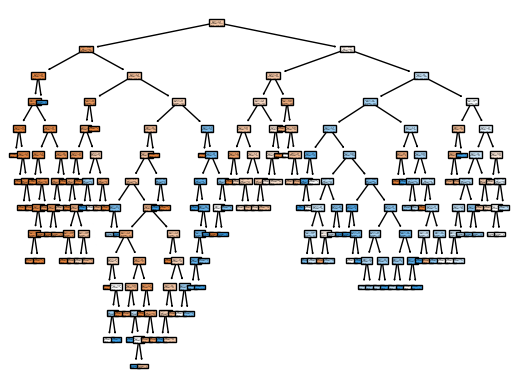

In [302]:
plot_tree(dtree_pipeline[-1], filled=True)

In [ ]:
param_grid_dtree = {"dectree__criterion" : ['gini', 'entropy', 'log_loss'], 
              "dectree__max_depth" : range(1,16),
              "dectree__min_samples_split" : [2, 0.1, 0.05, 0.01],
              "dectree__min_samples_leaf" : [1, 0.1, 0.05, 0.01],
              "dectree__min_weight_fraction_leaf" : [0.0, 0.2, 0.5],
              # "dectree__max_features" : [],
              "dectree__max_leaf_nodes" : [None, 50, 20],
              "dectree__min_impurity_decrease" : [0.0, 0.01, 0.1, 0.3],
              "dectree__class_weight" : [None, 'balanced'],
              # "dectree__ccp_alpha" : [],
              # "dectree__monotonic_cst" : []
             }

# Instantiate gridsearch and define the metric to optimize 
gs_dtree = GridSearchCV(dtree_pipeline, param_grid_dtree, scoring="roc_auc",
                  cv=StratifiedKFold(5), verbose=1, n_jobs=-1)
gs_dtree.fit(X_train, y_train)
gs_dtree.best_estimator_


In [ ]:
# print(f'Best Score roc_auc found: ',gs_dtree.best_score_.round(2))
# print('Best Parameters Found: ', gs_dtree.best_params_)
# best_dtree = gs_dtree.best_estimator_

In [ ]:
# plot_tree(best_dtree[-1], filled=True)

In [ ]:
# best_dtree.fit(X_train, y_train)

In [ ]:
# y_test_pred_dtree = best_dtree.predict(X_test)

# print(f'roc_auc score of our Decision Tree model on the test data: ', roc_auc_score(y_test, y_test_pred_dtree).round(2))